In [179]:
# generales
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
import scipy.stats as stats
import time

# tratamiento de datos faltantes e imputación
import missingno as msno
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier as rf 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, accuracy_score, roc_curve, auc, roc_auc_score, cohen_kappa_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# selección de variables
import xgboost as xgb
from sklearn.feature_selection import SelectFromModel, SelectKBest, chi2
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import preprocessing
from sklearn.svm import SVC

# Herramientas para graficos
import matplotlib.pyplot as plt

#configuraciones generales
pd.set_option('display.max_columns', None)

# Analisis Exploratorio

In [3]:
# Carga de los datos
weather_df = pd.read_csv("./dataset/dataset_corregido.csv")

weather_df.shape

(142193, 75)

In [4]:
# Visualizacion de las primeras 10 filas
weather_df.head(10)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month,Year,Day,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_MountGinini,Location_Newcastle,Location_Nhil,Location_NorahHead,Location_NorfolkIsland,Location_Nuriootpa,Location_PearceRAAF,Location_Penrith,Location_Perth,Location_PerthAirport,Location_Portland,Location_Richmond,Location_Sale,Location_SalmonGums,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,WindGustDir_sin,WindGustDir_cos,WindDir9am_sin,WindDir9am_cos,WindDir3pm_sin,WindDir3pm_cos
0,13.4,22.9,0.6,10.72,9.88,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,1.8,16.9,21.8,0,0,12,2008,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.000000,-1.836970e-16,-1.000000e+00,-1.836970e-16,-0.923880,3.826834e-01
1,7.4,25.1,0.0,7.84,12.12,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,0.8,2.6,17.2,24.3,0,0,12,2008,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.923880,3.826834e-01,-3.826834e-01,9.238795e-01,-0.923880,-3.826834e-01
2,12.9,25.7,0.0,7.92,11.58,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,0.8,2.0,21.0,23.2,0,0,12,2008,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.923880,-3.826834e-01,-1.000000e+00,-1.836970e-16,-0.923880,-3.826834e-01
3,9.2,28.0,0.0,5.76,10.86,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,1.8,2.0,18.1,26.5,0,0,12,2008,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.707107,7.071068e-01,7.071068e-01,-7.071068e-01,1.000000,6.123234e-17
4,17.5,32.3,1.0,6.00,8.44,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0,12,2008,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.000000,-1.836970e-16,9.238795e-01,3.826834e-01,-0.707107,7.071068e-01
5,14.6,29.7,0.2,8.40,10.88,56.0,19.0,24.0,55.0,23.0,1009.2,1005.4,3.4,4.0,20.6,28.9,0,0,12,2008,6,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.923880,3.826834e-01,-1.000000e+00,-1.836970e-16,-1.000000,-1.836970e-16
6,14.3,25.0,0.0,9.56,12.22,50.0,20.0,24.0,49.0,19.0,1009.6,1008.2,1.0,1.4,18.1,24.6,0,0,12,2008,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.000000,-1.836970e-16,-7.071068e-01,-7.071068e-01,-1.000000,-1.836970e-16
7,7.7,26.7,0.0,6.24,10.32,35.0,6.0,17.0,48.0,19.0,1013.4,1010.1,1.4,3.8,16.3,25.5,0,0,12,2008,8,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.000000,-1.836970e-16,3.826834e-01,-9.238795e-01,-1.000000,-1.836970e-16
8,9.7,31.9,0.0,8.08,8.50,80.0,7.0,28.0,42.0,9.0,1008.9,1003.6,3.2,3.4,18.3,30.2,0,1,12,2008,9,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.382683,9.238795e-01,7.071068e-01,-7.071068e-01,-0.707107,7.071068e-01
9,13.1,30.1,1.4,7.44,10.32,28.0,15.0,11.0,58.0,27.0,1007.0,1005.7,1.8,2.8,20.1,28.2,1,0,12,2008,10,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.000000,-1.836970e-16,1.224647e-16,-1.000000e+00,0.382683,-9.238795e-01


In [5]:
# Eliminar las columnas de Locations
weather_df = weather_df.drop(weather_df.filter(like='Location_').columns, axis=1)
weather_df

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month,Year,Day,WindGustDir_sin,WindGustDir_cos,WindDir9am_sin,WindDir9am_cos,WindDir3pm_sin,WindDir3pm_cos
0,13.4,22.9,0.6,10.72,9.88,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,1.8,16.9,21.8,0,0,12,2008,1,-1.000000,-1.836970e-16,-1.000000,-1.836970e-16,-0.923880,3.826834e-01
1,7.4,25.1,0.0,7.84,12.12,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,0.8,2.6,17.2,24.3,0,0,12,2008,2,-0.923880,3.826834e-01,-0.382683,9.238795e-01,-0.923880,-3.826834e-01
2,12.9,25.7,0.0,7.92,11.58,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,0.8,2.0,21.0,23.2,0,0,12,2008,3,-0.923880,-3.826834e-01,-1.000000,-1.836970e-16,-0.923880,-3.826834e-01
3,9.2,28.0,0.0,5.76,10.86,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,1.8,2.0,18.1,26.5,0,0,12,2008,4,0.707107,7.071068e-01,0.707107,-7.071068e-01,1.000000,6.123234e-17
4,17.5,32.3,1.0,6.00,8.44,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0,12,2008,5,-1.000000,-1.836970e-16,0.923880,3.826834e-01,-0.707107,7.071068e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,3.5,21.8,0.0,4.24,10.86,31.0,15.0,13.0,59.0,27.0,1024.7,1021.2,0.8,0.4,9.4,20.9,0,0,6,2017,20,1.000000,6.123234e-17,0.923880,-3.826834e-01,1.000000,6.123234e-17
142189,2.8,23.4,0.0,4.08,10.72,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,1.4,2.4,10.1,22.4,0,0,6,2017,21,1.000000,6.123234e-17,0.707107,-7.071068e-01,0.923880,3.826834e-01
142190,3.6,25.3,0.0,3.56,10.96,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,2.6,4.6,10.9,24.5,0,0,6,2017,22,-0.382683,9.238795e-01,0.707107,-7.071068e-01,0.000000,1.000000e+00
142191,5.4,26.9,0.0,5.32,10.16,37.0,9.0,9.0,53.0,24.0,1021.0,1016.8,2.8,2.4,12.5,26.1,0,0,6,2017,23,0.000000,1.000000e+00,0.707107,-7.071068e-01,-0.923880,3.826834e-01


In [7]:
weather_df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month,Year,Day,WindGustDir_sin,WindGustDir_cos,WindDir9am_sin,WindDir9am_cos,WindDir3pm_sin,WindDir3pm_cos
count,142193.000000,142193.000000,142193.000000,142193.000000,1.421930e+05,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,1.421930e+05,142193.000000,1.421930e+05,142193.000000,1.421930e+05
mean,12.189158,23.227503,2.327332,5.168594,7.462310e+00,39.927788,13.978424,18.564792,68.954548,51.551311,1017.733790,1015.331541,4.425209,4.474195,16.963983,21.717712,0.221305,0.224181,6.402544,2012.758926,15.715084,-0.033483,-5.555817e-02,0.013028,2.146866e-02,-0.017099,-4.611899e-02
std,6.401442,7.114948,8.426289,3.720718,3.518022e+00,13.157544,8.871215,8.782831,19.033849,20.697823,6.936084,6.855645,2.619865,2.427474,6.505241,6.965550,0.415127,0.417043,3.426506,2.541256,8.798150,0.721006,6.898907e-01,0.690669,7.227397e-01,0.712556,6.998942e-01
min,-8.500000,-4.800000,0.000000,0.000000,-8.881784e-16,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000,0.000000,1.000000,2007.000000,1.000000,-1.000000,-1.000000e+00,-1.000000,-1.000000e+00,-1.000000,-1.000000e+00
25%,7.600000,17.900000,0.000000,2.600000,4.900000e+00,31.000000,7.000000,13.000000,57.000000,37.000000,1013.200000,1010.700000,2.000000,2.400000,12.200000,16.600000,0.000000,0.000000,3.000000,2011.000000,8.000000,-0.707107,-7.071068e-01,-0.707107,-7.071068e-01,-0.707107,-7.071068e-01
50%,12.000000,22.600000,0.000000,4.480000,8.080000e+00,39.000000,13.000000,19.000000,70.000000,52.000000,1017.700000,1015.300000,5.000000,4.800000,16.700000,21.100000,0.000000,0.000000,6.000000,2013.000000,16.000000,0.000000,-1.836970e-16,0.000000,6.123234e-17,0.000000,-1.836970e-16
75%,16.900000,28.200000,0.600000,6.800000,1.030000e+01,46.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1019.940000,7.000000,7.000000,21.500000,26.450000,0.000000,0.000000,9.000000,2015.000000,23.000000,0.707107,7.071068e-01,0.707107,7.071068e-01,0.707107,7.071068e-01
max,33.900000,48.100000,371.000000,145.000000,1.450000e+01,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,8.000000,8.000000,40.200000,46.700000,1.000000,1.000000,12.000000,2017.000000,31.000000,1.000000,1.000000e+00,1.000000,1.000000e+00,1.000000,1.000000e+00


In [8]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 27 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   MinTemp          142193 non-null  float64
 1   MaxTemp          142193 non-null  float64
 2   Rainfall         142193 non-null  float64
 3   Evaporation      142193 non-null  float64
 4   Sunshine         142193 non-null  float64
 5   WindGustSpeed    142193 non-null  float64
 6   WindSpeed9am     142193 non-null  float64
 7   WindSpeed3pm     142193 non-null  float64
 8   Humidity9am      142193 non-null  float64
 9   Humidity3pm      142193 non-null  float64
 10  Pressure9am      142193 non-null  float64
 11  Pressure3pm      142193 non-null  float64
 12  Cloud9am         142193 non-null  float64
 13  Cloud3pm         142193 non-null  float64
 14  Temp9am          142193 non-null  float64
 15  Temp3pm          142193 non-null  float64
 16  RainToday        142193 non-null  int6

In [9]:
dtypes = weather_df.dtypes
num_columns = dtypes[dtypes == 'int64'].count() + dtypes[dtypes == 'float64'].count()
cat_collumns = dtypes[dtypes == 'object'].count()
print(f"Variables numericas: {num_columns}\nVariables categoricas: {cat_collumns}")

Variables numericas: 27
Variables categoricas: 0


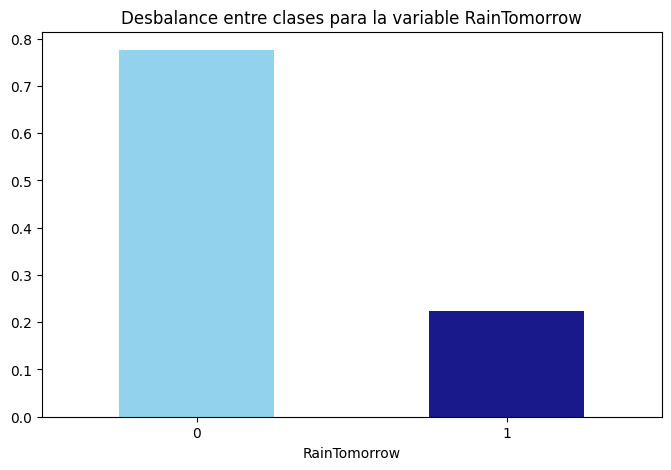

In [14]:
fig = plt.figure(figsize=(8,5))
weather_df.RainTomorrow.value_counts(normalize=True).plot(kind='bar', color=['skyblue', 'navy'], alpha=0.9, rot=0)
plt.title('Desbalance entre clases para la variable RainTomorrow')
plt.show()

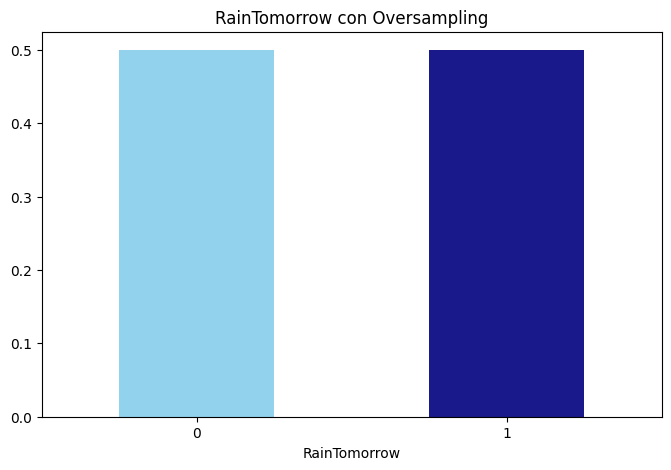

In [15]:
from sklearn.utils import resample
no_values = weather_df[weather_df.RainTomorrow == 0]
yes_values = weather_df[weather_df.RainTomorrow == 1]
yes_oversample = resample(yes_values, replace=True, n_samples=len(no_values), random_state=123)
oversampled = pd.concat([no_values, yes_oversample])

fig = plt.figure(figsize=(8,5))
oversampled.RainTomorrow.value_counts(normalize=True).plot(kind='bar', color=['skyblue', 'navy'], alpha=0.9, rot=0)
plt.title('RainTomorrow con Oversampling')
plt.show()

In [21]:
# Revision de datos para confirmar no existen valores nulos
missing_values = weather_df.isnull().sum()
percent_missing = (weather_df.isnull().sum()/len(weather_df))*100
values = {
    'missing_values': missing_values,
    'percent_missing': percent_missing,
    'data_type': weather_df.dtypes
}
frame = pd.DataFrame(values)
frame

,missing_values,percent_missing,data_type
MinTemp,0,0.0,float64
MaxTemp,0,0.0,float64
Rainfall,0,0.0,float64
Evaporation,0,0.0,float64
Sunshine,0,0.0,float64
WindGustSpeed,0,0.0,float64
WindSpeed9am,0,0.0,float64
WindSpeed3pm,0,0.0,float64
Humidity9am,0,0.0,float64
Humidity3pm,0,0.0,float64


# Baseline Definition

In [26]:
X = weather_df.drop(columns='RainTomorrow')
y = weather_df['RainTomorrow']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

In [54]:
# Baseline 1 - Predecir la salida como el resultado mas comun
rain_tomorrow_freq = y_test.value_counts(normalize=True)
y_pred_baseline1_test = rain_tomorrow_freq.idxmax()
y_pred_baseline1_test = np.array([y_pred_baseline1_test] * len(y_test))


In [55]:
# Baseline 2 - Predice que el resultado de si llovera mañana es igual al de RainToday
y_pred_baseline2_test = X_test['RainToday']

In [58]:
# Escalamiento de los datos
sc_X = StandardScaler()

X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


Text(0.5, 1.0, 'Baseline 1: Predice que no llueve')

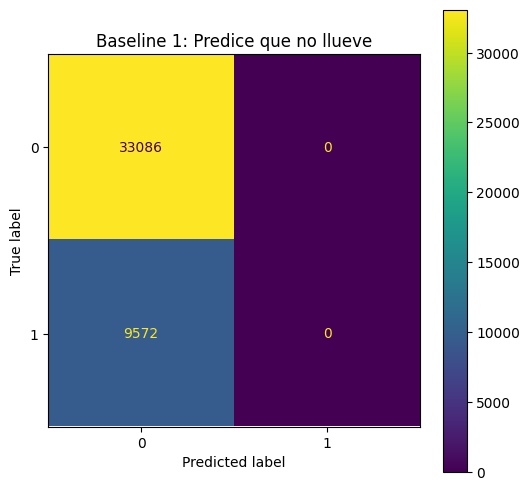

In [66]:
# Matriz de confusion
cm_baseline1 = confusion_matrix(y_true=y_test, y_pred=y_pred_baseline1_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_baseline1)

fig, ax = plt.subplots(figsize =(6,6))
ax.grid(False)
disp.plot(ax=ax)
ax.set_title("Baseline 1: Predice que no llueve")


Text(0.5, 1.0, 'Baseline 1: Predice igual que RainToday')

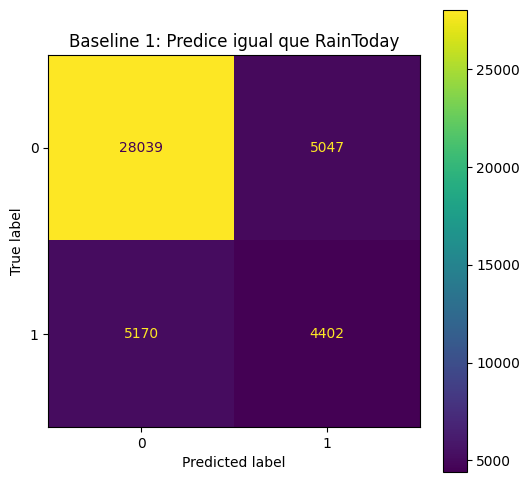

In [67]:
cm_baseline2 = confusion_matrix(y_true=y_test, y_pred=y_pred_baseline2_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_baseline2)

fig, ax = plt.subplots(figsize =(6,6))
ax.grid(False)
disp.plot(ax=ax)
ax.set_title("Baseline 1: Predice igual que RainToday")

In [73]:
def model_stats(modelname, confusion_matrix, y_test, y_pred):
    print(f"Metricas para el modelo: {modelname}")
    P = np.sum(confusion_matrix[1, :])
    N = np.sum(confusion_matrix[0, :])
    TP = confusion_matrix[1, 1]
    TN = confusion_matrix[0, 0]
    TPR = TP/P
    TNR = TN/N
    print(f"Sensitivity (Ability to predict TP): {TP/P}")
    print(f"Specificity (Ability to predict TN): {TN/N}")
    print(f"Balanced Accuracy: {(TPR + TNR)/2}")
    print(f"Precision: {precision_score(y_test, y_pred, zero_division=0)}")
    print(f"Recuperación: {recall_score(y_test, y_pred, zero_division=0)}")
    print(f"F1-score: {f1_score(y_test, y_pred, zero_division=0)}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print("="*25)

In [74]:
model_stats("Baseline 1", cm_baseline1, y_test, y_pred_baseline1_test)
model_stats("Baseline 2", cm_baseline2, y_test, y_pred_baseline2_test)

Metricas para el modelo: Baseline 1
Sensitivity (Ability to predict TP): 0.0
Specificity (Ability to predict TN): 1.0
Balanced Accuracy: 0.5
Precision: 0.0
Recuperación: 0.0
F1-score: 0.0
Accuracy: 0.7756106709175301
Metricas para el modelo: Baseline 2
Sensitivity (Ability to predict TP): 0.4598829920601755
Specificity (Ability to predict TN): 0.8474581393943057
Balanced Accuracy: 0.6536705657272406
Precision: 0.4658694041697534
Recuperación: 0.4598829920601755
F1-score: 0.4628568424373061
Accuracy: 0.7604904121149608


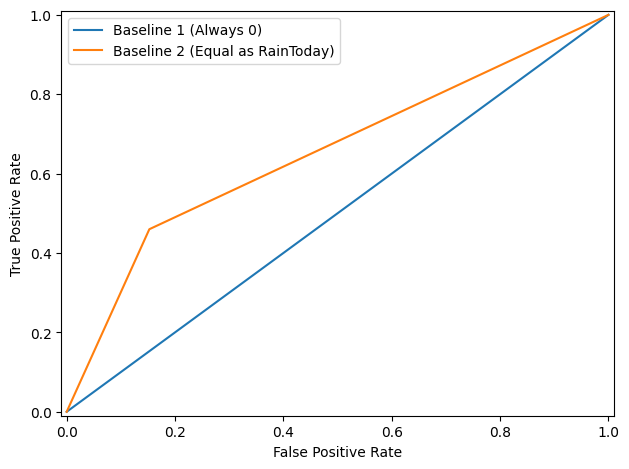

In [79]:
fpr_baseline1, tpr_baseline1, _ = roc_curve(y_test, y_pred_baseline1_test)
fpr_baseline2, tpr_baseline2, _ = roc_curve(y_test, y_pred_baseline2_test)

plt.plot(fpr_baseline1, tpr_baseline1, label="Baseline 1 (Always 0)")
plt.plot(fpr_baseline2, tpr_baseline2, label="Baseline 2 (Equal as RainToday)")
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.tight_layout()

In [81]:
print(f"AUC (Baseline 1): {auc(fpr_baseline1, tpr_baseline1)}")
print(f"AUC (Baseline 2): {auc(fpr_baseline2, tpr_baseline2)}")

AUC (Baseline 1): 0.5
AUC (Baseline 2): 0.6536705657272406


# Feature Selection

In [85]:
features_list = list(weather_df.columns.values)
features_list.remove("RainTomorrow")

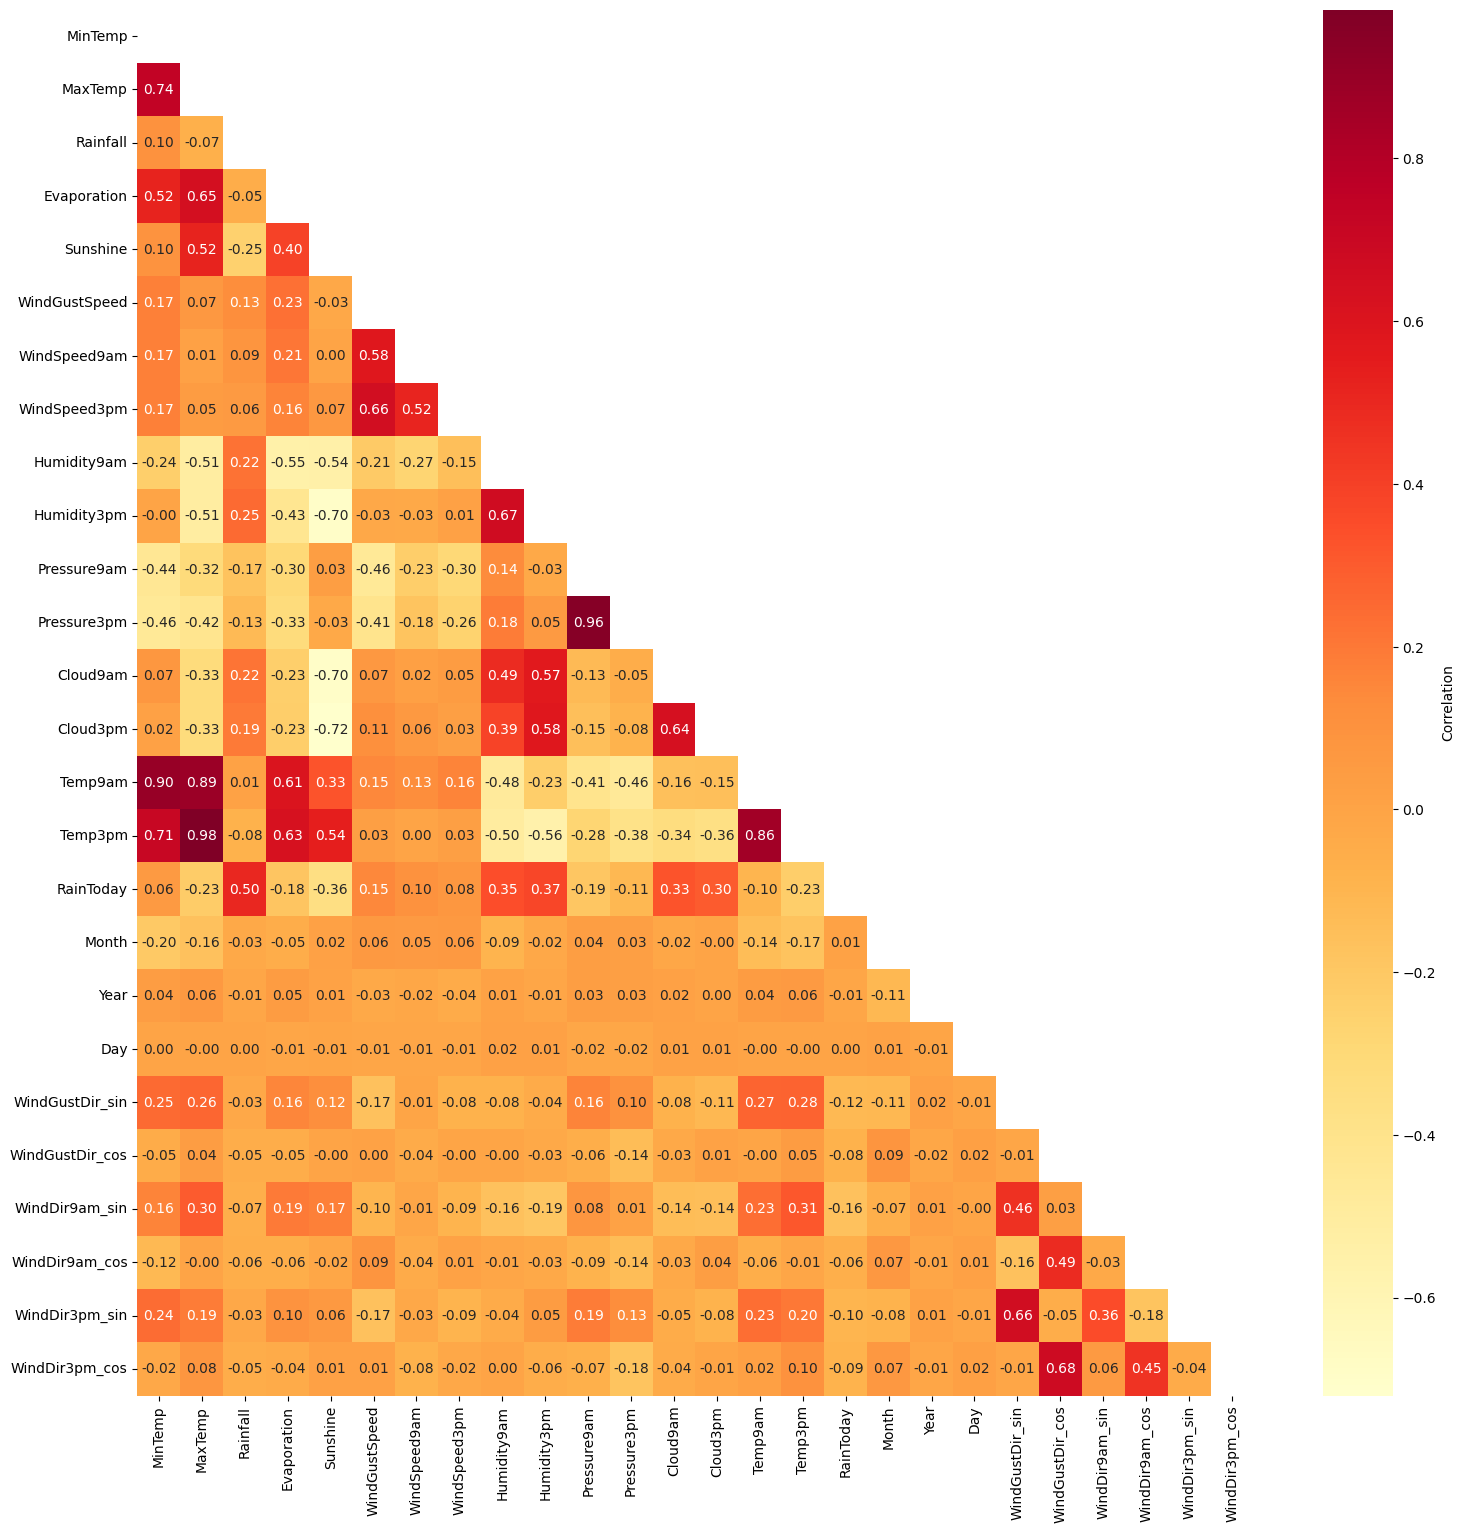

In [90]:
# Correlacion 
plt.figure(figsize=(18,18))

corr_weather = weather_df[features_list].corr()
mask = np.triu(np.ones_like(corr_weather, dtype=bool))
sns.heatmap(corr_weather, mask=mask, annot=True, cmap='YlOrRd', fmt=".2f", cbar_kws={'label': 'Correlation'})
plt.show()

In [91]:
# Eliminacion de datos con alta correlacion
columns_to_delete = ['Temp9am', 'Temp3pm', 'Pressure9am']
weather_df.drop(columns_to_delete, axis=1, inplace=True)

In [92]:
weather_df.columns.values

array(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'RainToday',
       'RainTomorrow', 'Month', 'Year', 'Day', 'WindGustDir_sin',
       'WindGustDir_cos', 'WindDir9am_sin', 'WindDir9am_cos',
       'WindDir3pm_sin', 'WindDir3pm_cos'], dtype=object)

In [97]:
# Standardizing data
r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(weather_df)
modified_data = pd.DataFrame(r_scaler.transform(weather_df), index=weather_df.index, columns=weather_df.columns)

In [102]:
# Filter feature importance using Chi-Square method
X = modified_data.loc[:,modified_data.columns != 'RainTomorrow']
y = modified_data['RainTomorrow']
selector = SelectKBest(chi2, k=10)
selector.fit(X, y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)])


Index(['Rainfall', 'Sunshine', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm',
       'Cloud9am', 'Cloud3pm', 'RainToday', 'WindGustDir_sin',
       'WindDir9am_sin'],
      dtype='object')


In [107]:
# Filter feature importance with the RainForest Classifier
X = weather_df.drop('RainTomorrow', axis=1)
y = weather_df['RainTomorrow']
selector = SelectFromModel(rf(n_estimators=100, random_state=0))
selector.fit(X, y)
support = selector.get_support()
features = X.loc[:, support].columns.to_list()
print(features)
print(rf(n_estimators=100, random_state=0).fit(X, y).feature_importances_)

['MinTemp', 'MaxTemp', 'Rainfall', 'Sunshine', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm', 'Pressure3pm', 'Cloud3pm']
[0.04680227 0.0465362  0.04923247 0.04141287 0.09060518 0.05390828
 0.03033881 0.0324452  0.04405633 0.15374399 0.07076095 0.03664068
 0.07074851 0.02017794 0.02438422 0.02494301 0.03436488 0.02067884
 0.02134492 0.02058982 0.02256654 0.02071922 0.02299886]


# Model selection

In [111]:
features_list = list(weather_df.columns.values)
features_list.remove('RainTomorrow')
features_list

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'RainToday',
 'Month',
 'Year',
 'Day',
 'WindGustDir_sin',
 'WindGustDir_cos',
 'WindDir9am_sin',
 'WindDir9am_cos',
 'WindDir3pm_sin',
 'WindDir3pm_cos']

In [112]:
# Split test and train datasets
features = weather_df[features_list]
target = weather_df['RainTomorrow']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=12345)

In [124]:
# Scale test and train datasets
r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(X_train)
X_train = pd.DataFrame(r_scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(r_scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

In [133]:
# Function to execute and evaluate a model
def run_model(model, X_train, y_train, X_test, y_test, modelname):
    start_time = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    probs = model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, probs)
    coh_kap = cohen_kappa_score(y_test, y_pred)
    time_taken = time.time() - start_time

    # Plot ROC curve
    fper, tper, thresholds = roc_curve(y_test, probs)
    plot_roc_cur(fper, tper)

    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=plt.cm.Blues)
    plt.show()

    matrix = confusion_matrix(y_test, y_pred)
    model_stats(modelname, matrix, y_test, y_pred)

    return model, accuracy, roc_auc, coh_kap, time_taken
    
# Function to plot the ROC curve
def plot_roc_cur(fper, tper):
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()


### Logistic Regresion

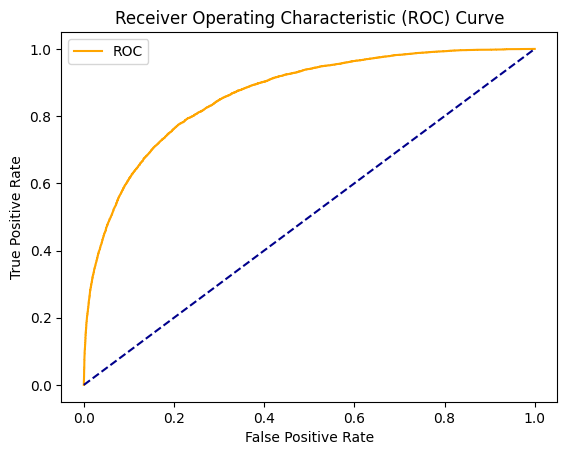

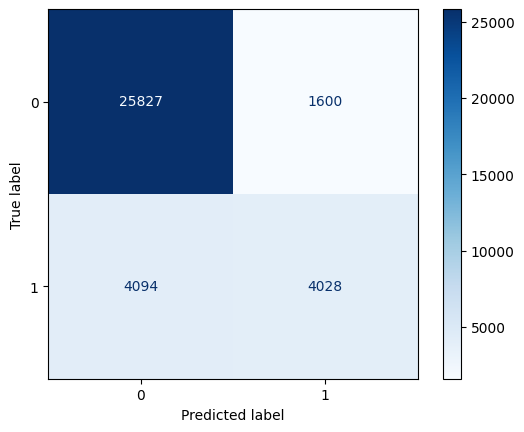

Metricas para el modelo: Logistic Regresion
Sensitivity (Ability to predict TP): 0.49593696133957155
Specificity (Ability to predict TN): 0.9416633244612973
Balanced Accuracy: 0.7188001429004345
Precision: 0.7157071783937455
Recuperación: 0.49593696133957155
F1-score: 0.5858909090909091
Accuracy: 0.8398267180511407


In [166]:
params_lr = {'penalty':'l1', 'solver': 'liblinear'}

model_lr = LogisticRegression(**params_lr)
model_lr, accuracy_lr, roc_auc_lr, coh_kap_lr, time_taken_lr = run_model(model_lr, X_train, y_train, X_test, y_test, "Logistic Regresion")

### Decision Tree

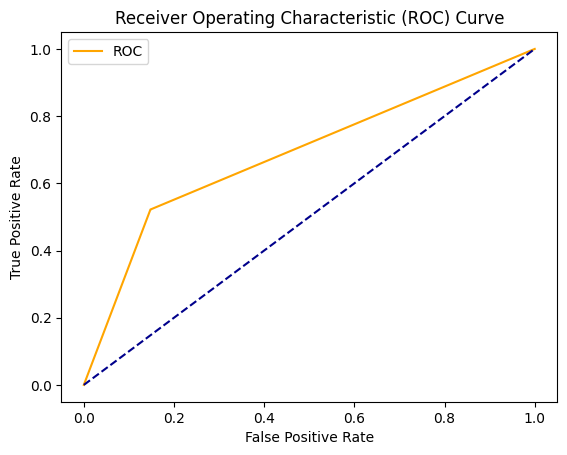

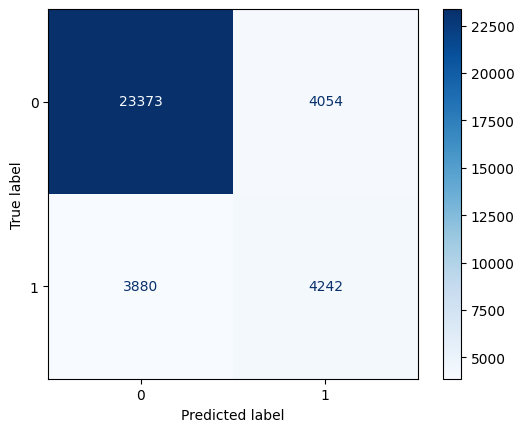

Metricas para el modelo: Decission Tree
Sensitivity (Ability to predict TP): 0.5222851514405319
Specificity (Ability to predict TN): 0.8521894483538119
Balanced Accuracy: 0.6872372998971719
Precision: 0.5113307618129219
Recuperación: 0.5222851514405319
F1-score: 0.516749908636862
Accuracy: 0.7768151002841149


In [167]:
params_dt = {
    'max_depth': 30,
    'max_features': 'sqrt'
}

model_dt = DecisionTreeClassifier(**params_dt)
model_dt, accuracy_dt, roc_auc_dt, coh_kap_dt, time_taken_dt = run_model(model_dt, X_train, y_train, X_test, y_test, "Decission Tree")

### Random Forest

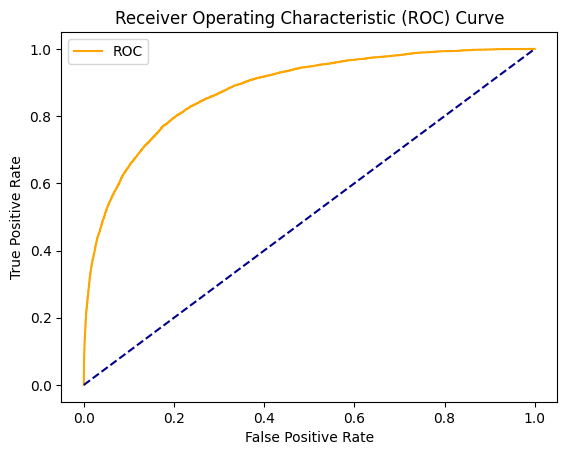

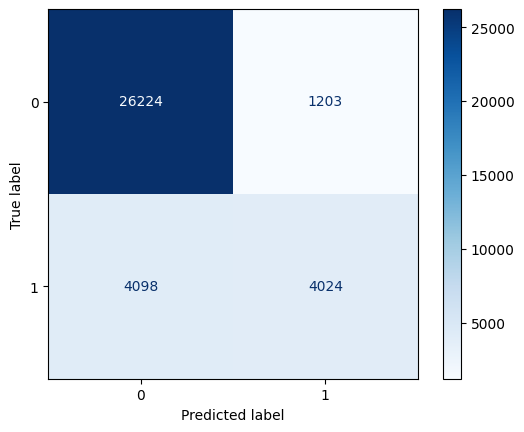

Metricas para el modelo: Random Forest
Sensitivity (Ability to predict TP): 0.49544447180497414
Specificity (Ability to predict TN): 0.9561381120793379
Balanced Accuracy: 0.725791291942156
Precision: 0.7698488616797398
Recuperación: 0.49544447180497414
F1-score: 0.6028916023672185
Accuracy: 0.8508818813468734


In [168]:
params_rf = {
    'max_depth': 16,
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'n_estimators': 100,
    'random_state': 12345
}

model_rf = rf(**params_rf)
model_rf, accuracy_rf, roc_auc_rf, coh_kap_rf, time_taken_rf = run_model(model_rf, X_train, y_train, X_test, y_test, "Random Forest")

### Light GBM

In [150]:
# from lightgbm import lgb

# params_lgb = {
#     'colsample_bytree': 0.95,
#     'max_depth': 16,
#     'min_split_gain': 0.1,
#     'n_estimators': 200,
#     'num_leaves': 50,
#     'reg_alpha': 1.2,
#     'reg_lambda': 1.2,
#     'subsample': 0.95,
#     'subsample_freq': 20
# }

# model_lgb = lgb.LGBMClassifier(**params_lgb)
# model_lgb, accuracy_lgb, roc_auc_lgb, coh_kap_lgb, time_taken_lgb = run_model(model_lgb, X_train, y_train, X_test, y_test, "Light GBM")

### XG Boost

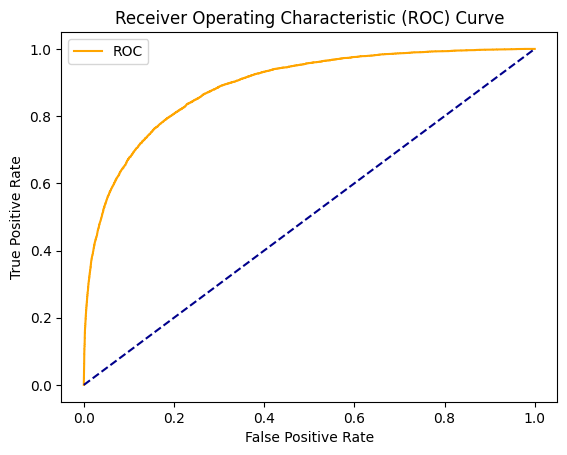

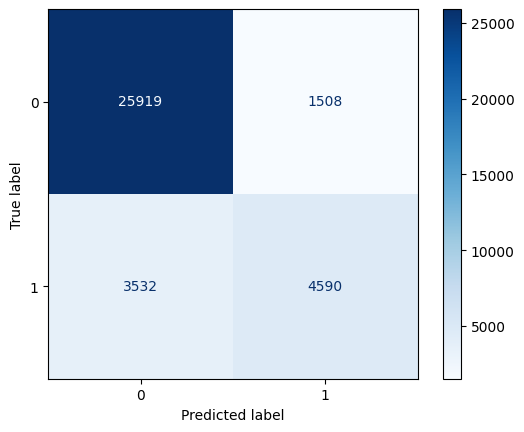

Metricas para el modelo: XGBoost
Sensitivity (Ability to predict TP): 0.5651317409505048
Specificity (Ability to predict TN): 0.9450176833047726
Balanced Accuracy: 0.7550747121276387
Precision: 0.7527058051820269
Recuperación: 0.5651317409505048
F1-score: 0.6455696202531646
Accuracy: 0.8582238600241919


In [169]:
params_xgb = {
    'n_estimators': 500,
    'max_depth': 16
}

model_xgb = xgb.XGBClassifier(**params_xgb)
model_xgb, accuracy_xgb, roc_auc_xgb, coh_kap_xgb, time_taken_xgb = run_model(model_xgb, X_train, y_train, X_test, y_test, "XGBoost")

### kNN

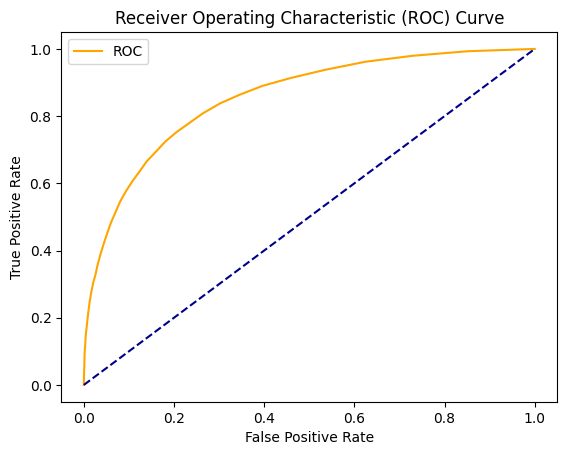

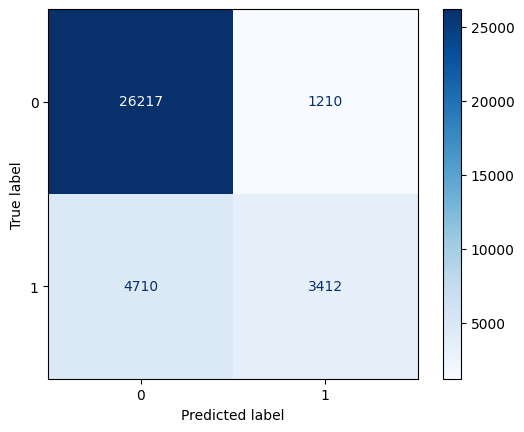

Metricas para el modelo: k-NN
Sensitivity (Ability to predict TP): 0.4200935730115735
Specificity (Ability to predict TN): 0.9558828891238561
Balanced Accuracy: 0.6879882310677148
Precision: 0.7382085677196019
Recuperación: 0.4200935730115735
F1-score: 0.5354676710608914
Accuracy: 0.8334692959014318


In [172]:
from sklearn.neighbors import KNeighborsClassifier

params_knn = {
    'n_neighbors': 23,
    'metric': 'minkowski',
    'p': 2
}

model_knn = KNeighborsClassifier(**params_knn)
model_knn, accuracy_knn, roc_auc_knn, coh_kap_knn, time_taken_knn = run_model(model_knn, X_train, y_train, X_test, y_test, "k-NN")

In [176]:
# # Hyperparameter search for k-NN
# from sklearn.model_selection import RandomizedSearchCV

# classifier_knn = KNeighborsClassifier()

# hyperparams = {"n_neighbors": np.arange(1, 30),    # Cantidad de vecinos.
#                "weights": ["uniform", "distance"],  # Como se pesa los votos
#                "p": np.arange(1.0, 30.0)}              # Valores para la distancia de Minkowski

# # Creamos un método de busqueda por grilla:
# grid = RandomizedSearchCV(classifier_knn,
#                     hyperparams,
#                     refit=False,
#                     cv=3,
#                     scoring='accuracy',
#                     n_jobs=-1)

# grid.fit(X_train, y_train)

### SVM

In [180]:
svm_linear = SVC(kernel='linear')

model_svm = GridSearchCV(svm_linear, {'C': [0.1]}, refit=True, cv=5, scoring='accuracy')
model_svm, accuracy_svm, roc_auc_svm, coh_kap_svm, time_taken_svm = run_model(model_svm, X_train, y_train, X_test, y_test, "SVM")

### Model Comparison

/var/folders/gw/t67cp6p50lzcywhjff14xsz00000gn/T/ipykernel_18919/365518876.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x='Model', y='Accuracy', data=data, palette='mako')


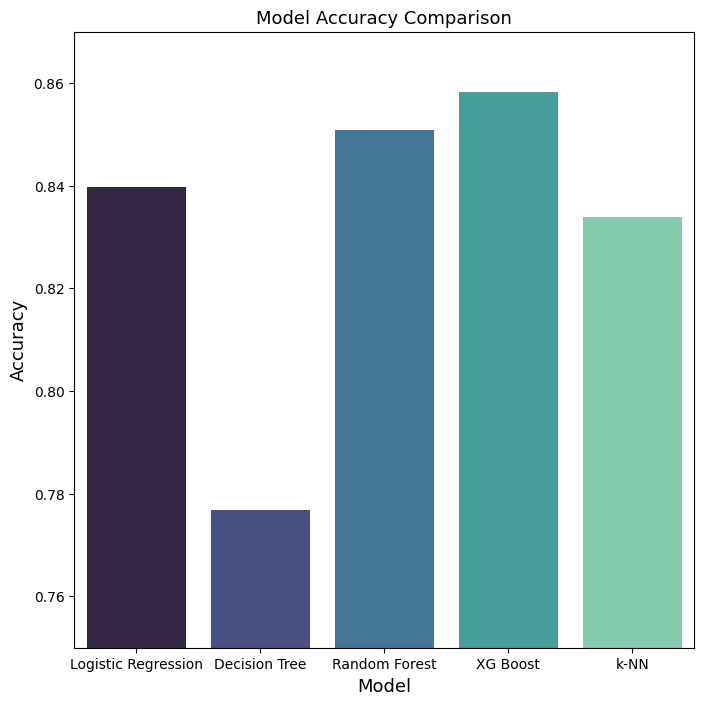

In [171]:
accuracy_scores = [accuracy_lr, accuracy_dt, accuracy_rf, accuracy_xgb, accuracy_knn]
roc_auc_scores = [roc_auc_lr, roc_auc_dt, roc_auc_rf, roc_auc_xgb, roc_auc_knn]
coh_kap_scores = [coh_kap_lr, coh_kap_dt, coh_kap_rf, coh_kap_xgb, coh_kap_knn]
time_taken_score = [time_taken_lr, time_taken_dt, time_taken_rf, time_taken_xgb, time_taken_knn]

model_data = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XG Boost', 'k-NN'],
    'Accuracy': accuracy_scores,
    'ROC_AUC': roc_auc_scores,
    'Cohen_Kappa': coh_kap_scores
}

data = pd.DataFrame(model_data)

fig, ax1 = plt.subplots(figsize=(8,8))
ax1.set_title('Model Accuracy Comparison', fontsize=13)
ax1.set_xlabel('Model', fontsize=13)
ax1.set_ylabel('Accuracy', fontsize=13)
ax1.set(ylim=(0.75, 0.87))
ax1 = sns.barplot(x='Model', y='Accuracy', data=data, palette='mako')
ax1.tick_params(axis='y')